In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Implement PCA algorithm

In [28]:
def PCA_implement (X, n_components):

    # 1. Scaling data: substract the mean of each variable
    X_scaled = X - np.mean(X, axis = 0)
    

    # 2. Calculate the Covariance Matrix
    cov_mat = np.cov(X_scaled, rowvar = False) # rowvar = False: each column represents a variable, while the rows contain observations.

    # 3. Compute the Eigenvalues and Eigenvectors
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    print("Eigenvector: \n",eigen_vectors,"\n")
    print("Eigenvalues: \n", eigen_values, "\n")

    # 4. Sort eigenvalues, eigenvectors
    sorted_index = np.argsort(eigen_values)[::-1]

    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    

    # 5. Select a subset from the rearranged Eigenvalue matrix
    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
    print("select: \n", eigenvector_subset, "\n")
    # 6. Transform data
    X_reduced = np.dot(eigenvector_subset.transpose(), X_scaled.transpose()).transpose()

    return X_reduced



In [29]:
# Link data: "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv('iris.data', names=['sepal length','sepal width','petal length','petal width','species'])
data
     

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
X_iris = data.iloc[:,0:4]
X_iris

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
y = data.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [32]:
X_scaled = X_iris - np.mean(X_iris, axis = 0)
X_scaled

,sepal length,sepal width,petal length,petal width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
...,...,...,...,...
145,0.856667,-0.054,1.441333,1.101333
146,0.456667,-0.554,1.241333,0.701333
147,0.656667,-0.054,1.441333,0.801333
148,0.356667,0.346,1.641333,1.101333


In [33]:
cov_mat = np.cov(X_scaled, rowvar = False)
cov_mat

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [34]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[ 0.31725455  0.58099728  0.65653988 -0.36158968]
 [-0.32409435 -0.59641809  0.72971237  0.08226889]
 [-0.47971899 -0.07252408 -0.1757674  -0.85657211]
 [ 0.75112056 -0.54906091 -0.07470647 -0.35884393]] 

Eigenvalues: 
 [0.02368303 0.07852391 0.24224357 4.22484077] 



### Visual explained_variance

In [35]:
total_explained_variance = sum(eigen_values)
total_explained_variance

4.569291275167782

In [36]:
# Calculate the proportion of variance explained by each feature
prop_var_exp = [(i/total_explained_variance) 
            for i in sorted(eigen_values, reverse = True)]

print(prop_var_exp)
for i in range(len(prop_var_exp)):
    print(f'PC{i+1} takes {prop_var_exp[i]*100}%')

[0.9246162071742683, 0.05301556785053518, 0.0171851395250069, 0.005183085450189617]
PC1 takes 92.46162071742683%
PC2 takes 5.301556785053518%
PC3 takes 1.71851395250069%
PC4 takes 0.5183085450189617%


In [37]:
cumsum_exp_var = np.cumsum(prop_var_exp)
cumsum_exp_var

array([0.92461621, 0.97763178, 0.99481691, 1.        ])

In [38]:
# #plt.bar(range(0,len(var_exp)), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
# plt.plot(range(0, len(cumsum_exp_var)), cumsum_exp_var, label = "cummulative explained variance")
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal component index')
# plt.legend(loc = 'best')
# plt.tight_layout
# plt.show()

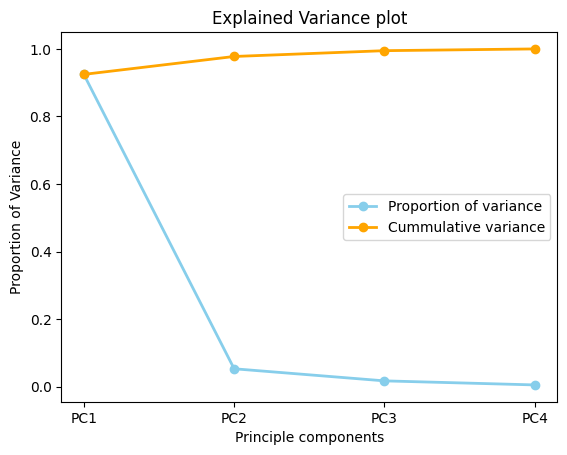

In [39]:
x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var_exp))]

plt.plot(x_labels, prop_var_exp, marker = 'o', markersize = 6, color = 'skyblue', linewidth = 2, label = 'Proportion of variance')
plt.plot(x_labels, cumsum_exp_var, marker = 'o', color = 'orange', linewidth = 2, label = 'Cummulative variance')
plt.legend()
plt.title('Explained Variance plot')
plt.xlabel('Principle components')
plt.ylabel('Proportion of Variance')
plt.show()

In [40]:
pc = 2 # n_components
sorted_index = np.argsort(eigen_values)[::-1]

sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

# 5. Select a subset from the rearranged Eigenvalue matrix
eigenvector_subset = sorted_eigenvectors[:, 0:pc]
print("select: \n", eigenvector_subset, "\n")


select: 
 [[-0.36158968  0.65653988]
 [ 0.08226889  0.72971237]
 [-0.85657211 -0.1757674 ]
 [-0.35884393 -0.07470647]] 



In [41]:
sorted_eigenvalue

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [42]:
X_reduced = np.dot(eigenvector_subset.transpose(), X_scaled.transpose()).transpose()


df = pd.DataFrame(X_reduced, columns = ['PC1','PC2'])
df = pd.concat([df, pd.DataFrame(y)], axis = 1)
df

,PC1,PC2,species
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

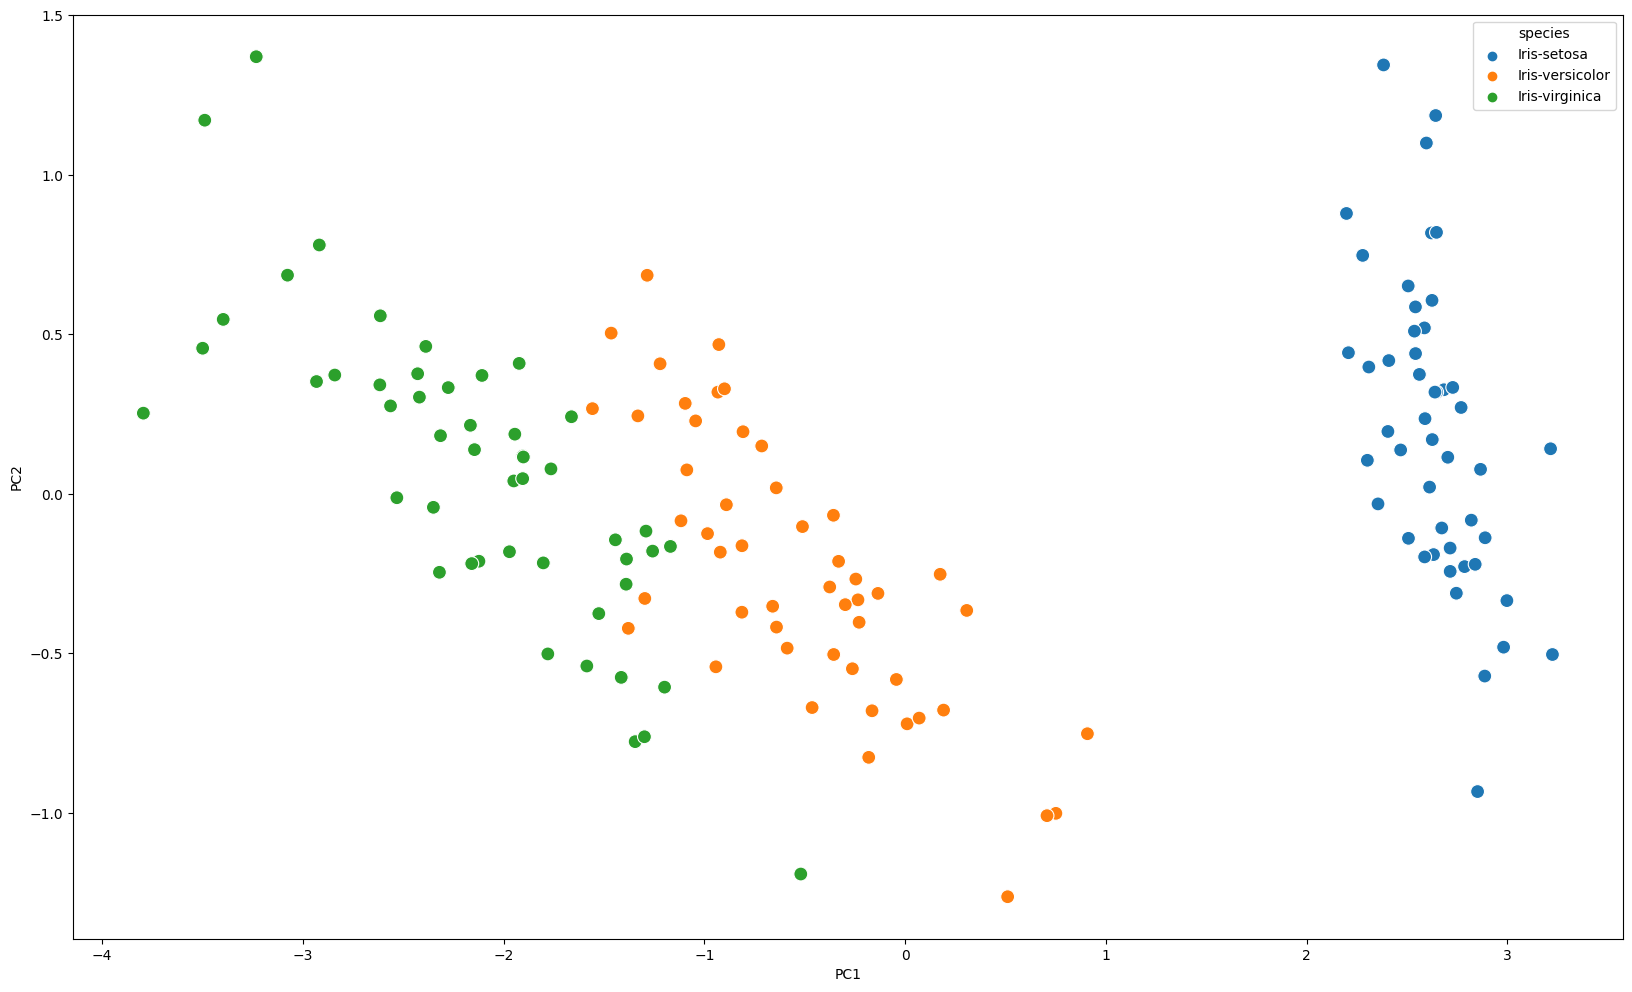

In [43]:
plt.figure(figsize = (20,12))
sns.scatterplot(data = df, x = 'PC1', y = 'PC2', hue = 'species', s =100)

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(X_iris)
pca_df = pd.DataFrame(pca, columns = ['PC1', 'PC2'])
pca_df = pd.concat([pca_df, pd.DataFrame(y)], axis = 1)
pca_df



,PC1,PC2,species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

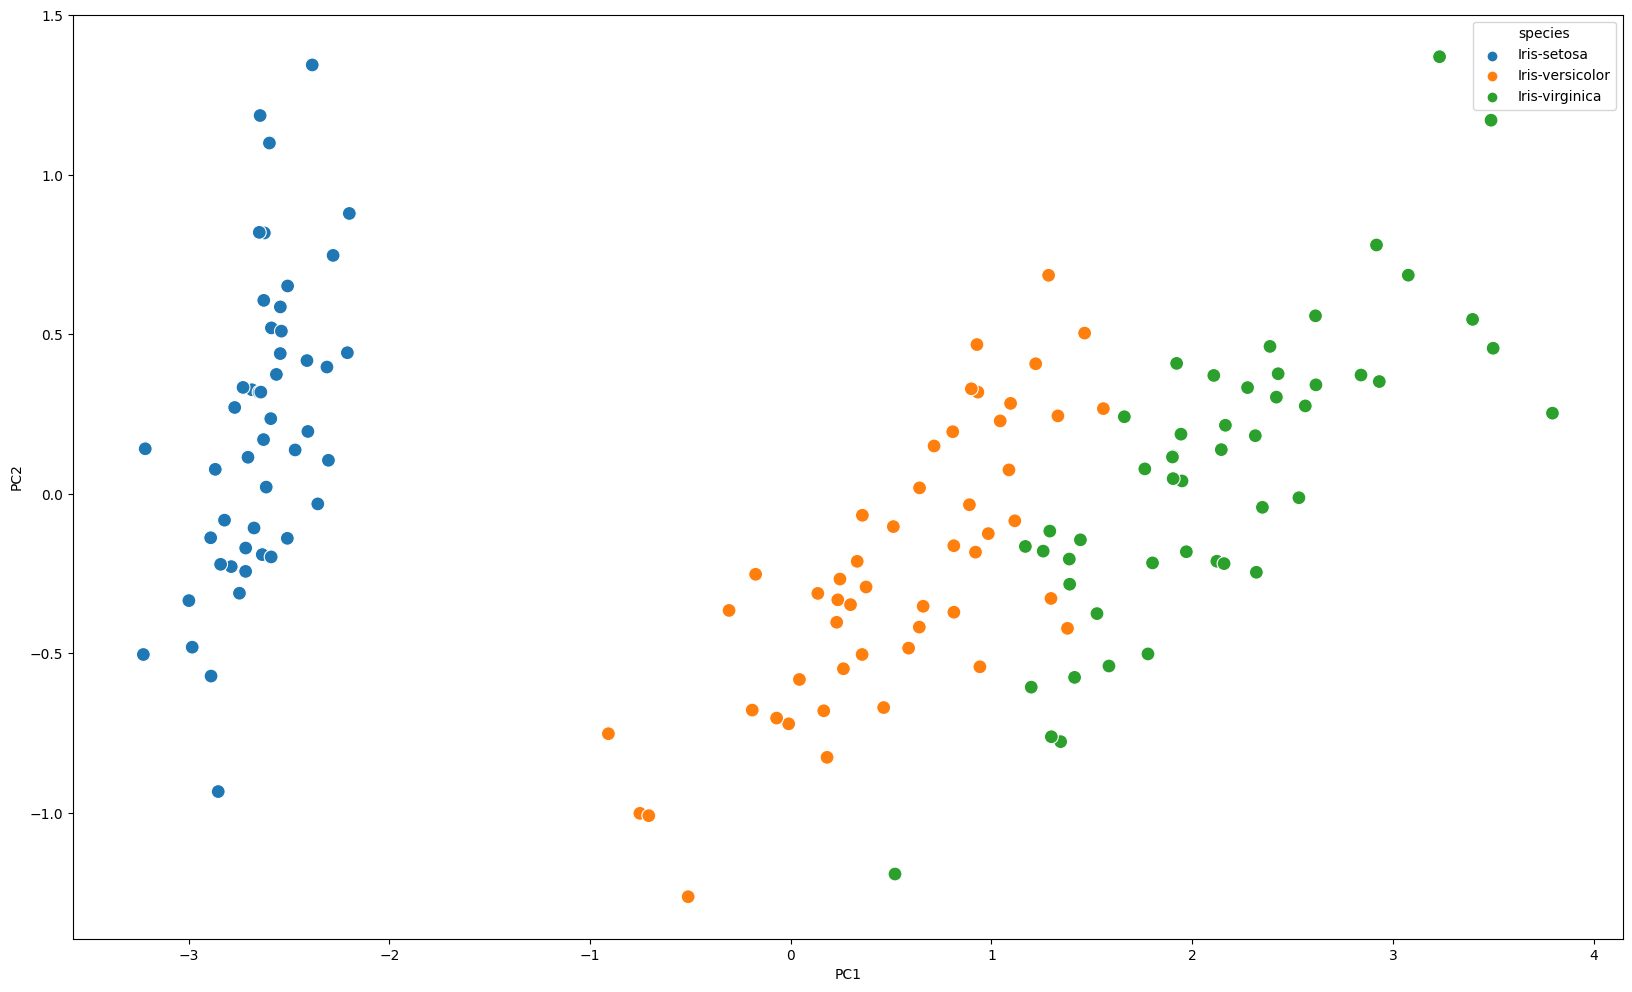

In [45]:
plt.figure(figsize = (20,12))
sns.scatterplot(data = pca_df  , x = 'PC1',y = 'PC2' , hue = 'species' , s = 100 )
     